## Tarea 1 - Programación
### Camila Alejandra Pinzón Caro

3. Escriba una clase con las siguientes funcionalidades:

   3.1 Al instanciar un objeto, lee un conjunto de datos numéricos. Por ejemplo puede usar el mismo conjunto de datos iris.csv. Instancie los datos en un dataframe de Pandas.

   3.2 Implemente un método que calcule las estadísticas descriptivas básicas de cada una de las variables (sepal.length, sepal.width, petal.length, etc)

   3.3 Implemente un método que entregue los nombre de las variables disponibles.

   3.4 Implemente un método que reciba el nombre de una variable disponible dentro del objeto (en el dataframe) y regrese: sus estadísticas básicas: media, mediana, desviación, percentiles q25, q50, q75 y dibuje un histograma de la distribución de la variable.

In [ ]:
# Se crgan las bases de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Base de datos importada
iris = pd.read_csv("iris.csv")
iris.head()

In [114]:
class ClaseDescriptiva:
    
    # leer la base de datos e instanciarlos en un df
    def __init__(self,data):
        self.base = pd.read_csv(data) 
            
    # estadisticas basicas por defecto
    def statsbasicas(self):
        return self.base.describe()
    
    # devolver las variables disponibles
    def variables(self):
        return self.base.columns.tolist()
    
    # analisis descriptivo personalizado
    def analisis_var(self, nombre):
        var_numericas = self.base.select_dtypes(include=['number'])
        if nombre in self.base.columns and nombre in var_numericas.columns:
            variable = self.base[nombre]
            # Estadisticas basicas
            media = variable.mean()
            mediana = variable.median()
            desviacion = variable.std()
            q25 = variable.quantile(0.25)
            q75 = variable.quantile(0.75)
            
            # Histograma
            plt.hist(variable, bins = 18, color="#00BFBF")
            plt.title(f'Histograma de la variable {nombre}, de la base de datos iris')
            plt.xlabel(nombre)
            plt.ylabel('Frecuencia')
            plt.show()
            
            return {
                'Media': media,
                'Mediana': mediana,
                'Desviación Estándar': desviacion,
                'Percentil 25': q25,
                'Percentil 50': mediana,
                'Percentil 75': q75
            }
        else:
            return f'¡ERROR!\nNo es posible realizar el análisis descriptivo.\nLa variable "{nombre}" no existe en el conjunto de datos, o no es de tipo numérico. \nRevisela'
    

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']


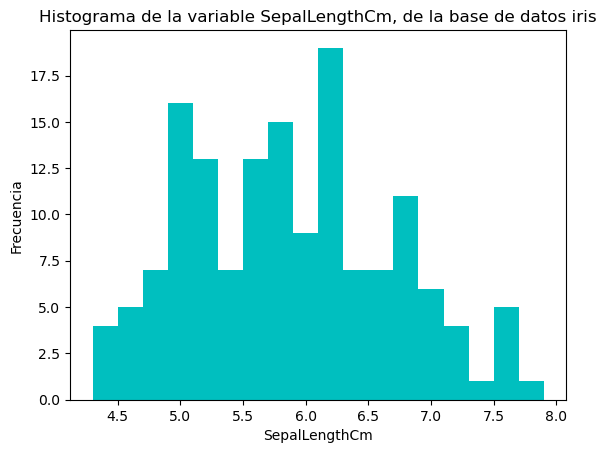

{'Media': 5.843333333333334, 'Mediana': 5.8, 'Desviación Estándar': 0.8280661279778629, 'Percentil 25': 5.1, 'Percentil 50': 5.8, 'Percentil 75': 6.4}
¡ERROR!
No es posible realizar el análisis descriptivo.
La variable "Hola" no existe en el conjunto de datos, o no es de tipo numérico. 
Revisela


In [115]:
# Prueba de la clase y de sus distintos métodos

analisis_iris = ClaseDescriptiva("iris.csv")

# prueba del análsis básico
print(analisis_iris.statsbasicas() )

# prueba de las variables visponibles
print(analisis_iris.variables() )

# prueba del analisis descrptivo personalizado
print(analisis_iris.analisis_var("SepalLengthCm") )
print(analisis_iris.analisis_var("Hola") )